# Project 2: Ames Iowa MLR
## Thomas Ludlow, DSI-NY-6

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score

%matplotlib inline

##### Pandas Display Options - increase max rows/columns

In [2]:
pd.options.display.max_columns = 101
pd.options.display.max_rows = 2101

### Training Data

In [3]:
df = pd.read_csv('./datasets/train.csv')

In [4]:
df_to_pred = pd.read_csv('./datasets/test.csv')

In [5]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
df.shape

(2051, 81)

In [7]:
df_to_pred.shape

(879, 80)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [9]:
df_to_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

## EDA and Data Cleanup

###### Column Names Formatting

In [ ]:
df.columns = [name.lower().replace(' ','_') for name in df.columns]

In [ ]:
df_to_pred.columns = [name.lower().replace(' ','_') for name in df_to_pred.columns]

### Review of 'NaN' values vs. 'NA' category values

###### Full Null Values Columns

In [ ]:
df.isnull().sum()

In [ ]:
df_to_pred.isnull().sum()

##### Null 'Lot Frontage'

In [ ]:
df[df['lot_frontage'].isnull()][df.columns[71:]]

##### Lot Config contains 'FR' frontage, but Lot Frontage is NaN

In [ ]:
df[(df['lot_frontage'].isnull())&(df['lot_config'].str.contains('FR'))][df.columns[9:20]]

In [ ]:
df[df.columns[-10:]]

## Data Cleanup

###### Instantiate Removed Rows DF

In [ ]:
df_removed = pd.DataFrame()

###### Remove bad Lot Frontage rows and Fill NaN values with 0

In [ ]:
df[(df['lot_frontage'].isnull())&(df['lot_config'].str.contains('FR'))]

In [ ]:
df_removed = df_removed.append(df[(df['lot_frontage'].isnull())&(df['lot_config'].str.contains('FR'))])

In [ ]:
df.drop(df[(df['lot_frontage'].isnull())&(df['lot_config'].str.contains('FR'))].index, inplace=True)

In [ ]:
df.lot_frontage.fillna(0,inplace=True)

In [ ]:
df_to_pred.lot_frontage.fillna(0,inplace=True)

###### Masonry Veneer Type / Area

In [ ]:
df[df.mas_vnr_type.isnull()]

In [ ]:
df.mas_vnr_type.fillna('None',inplace=True)

In [ ]:
df.mas_vnr_area.fillna(0,inplace=True)

In [ ]:
df_to_pred.mas_vnr_type.fillna('None',inplace=True)

In [ ]:
df_to_pred.mas_vnr_area.fillna(0,inplace=True)

#### Basement Cleanup

###### Remove Questionable Basement Exposure NaNs

In [ ]:
df[(df['bsmt_cond'].notnull())&(df['bsmt_exposure'].isnull())]

In [ ]:
df_removed = df_removed.append(df[(df['bsmt_cond'].notnull())&(df['bsmt_exposure'].isnull())])

In [ ]:
df.drop([1456,1547,1997],inplace=True)

In [ ]:
df.loc[1147][30:51]

In [ ]:
df_removed = df_removed.append(df.loc[1147])

In [ ]:
df.drop(1147,inplace=True)

###### Fill NA values ('NA' for categories, 0 for sqft values)

In [ ]:
df_to_pred.columns

In [ ]:
df[df.columns[31:40]].isnull().sum()

In [ ]:
bsmt_qualitative = ['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']

In [ ]:
for col in bsmt_qualitative:
    df[col].fillna('NA',inplace=True)
    df_to_pred[col].fillna('NA',inplace=True)

In [ ]:
bsmt_quantitative = ['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf']

In [ ]:
for col in bsmt_quantitative:
    df[col].fillna(0,inplace=True)
    df_to_pred[col].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()[30:52]

In [ ]:
df[['bsmt_qual','bsmt_cond','bsmt_exposure',
          'bsmtfin_type_1','bsmtfin_type_2']]

In [ ]:
df[(df.bsmt_full_bath.isnull())|(df.bsmt_half_bath.isnull())]

In [ ]:
df.bsmt_full_bath.fillna(0,inplace=True)
df.bsmt_half_bath.fillna(0,inplace=True)

In [ ]:
df_to_pred.bsmt_full_bath.fillna(0,inplace=True)
df_to_pred.bsmt_half_bath.fillna(0,inplace=True)

In [ ]:
df[(df['bsmt_full_bath']==0)|(df['bsmt_half_bath']==0)][['bsmt_qual','bsmt_full_bath','bsmt_half_bath']]

###### Remove Garage with Missing Year Data

In [ ]:
df_removed = df_removed.append(df.loc[1712])

In [ ]:
df.drop(1712,inplace=True)

###### Correct 'garage_yr_blt' from 2207 to 2007

In [ ]:
df[df['garage_yr_blt']>2010][['year_built','garage_yr_blt']]

In [ ]:
df.loc[1699,'garage_yr_blt'] = 2007

###### Fill remaining NA values per Data Dictionary

In [ ]:
garage_na_cols = ['alley','fireplace_qu','garage_type',
                  'garage_finish','garage_qual','garage_cond',
                  'pool_qc','fence','misc_feature']

for col in garage_na_cols:
    df[col].fillna('NA',inplace=True)
    df_to_pred[col].fillna('NA',inplace=True)

In [ ]:
df_to_pred.electrical.fillna('NA',inplace=True)

##### Binarize 'street' as 'street_is_paved'

In [ ]:
df.street = df.street.map({'Pave':1,'Grvl':0})
df_to_pred.street = df_to_pred.street.map({'Pave':1,'Grvl':0})

In [ ]:
df.rename(columns={'street':'street_is_pave'},inplace=True)
df_to_pred.rename(columns={'street':'street_is_pave'},inplace=True)

##### Binarize Central Air

In [ ]:
df.central_air = df.central_air.map({'Y':1,'N':0})
df_to_pred.central_air = df_to_pred.central_air.map({'Y':1,'N':0})

In [ ]:
df.rename(columns={'central_air':'has_central_air'},inplace=True)
df_to_pred.rename(columns={'central_air':'has_central_air'},inplace=True)

##### Add 'age at sale' column

In [ ]:
df['age_at_sale'] = df['yr_sold'] - df['year_built']

In [ ]:
df_to_pred['age_at_sale'] = df_to_pred['yr_sold'] - df_to_pred['year_built']

##### Add 'age of remod' column

In [ ]:
df['age_of_remod'] = df['yr_sold'] - df['year_remod/add']

In [ ]:
df_to_pred['age_of_remod'] = df_to_pred['yr_sold'] - df_to_pred['year_remod/add']

##### Add 'sale_time_to_recession' column

In [ ]:
def m_y_to_recession_in_yrs(month, year):
    r_mo = 9
    r_yr = 2008
    s_t_t_r=0
    if year==r_yr:
        s_t_t_r = (month - r_mo) / 12
    elif year>r_yr:
        if month>=r_mo:
            s_t_t_r = (year - r_yr) + (month - r_mo)/12
        elif month<r_mo:
            s_t_t_r = (year - r_yr - 1) + (month+12 - r_mo)/12
    else:
        s_t_t_r = (year - r_yr) + (month - r_mo)/12
    return s_t_t_r

In [ ]:
def m_y_to_recession_in_yrs_srs(df, month, year):
    r_mo = 9
    r_yr = 2008
    s_t_t_r={}
    for i, row in df.iterrows():
        if year.loc[i]==r_yr:
            s_t_t_r[i] = (month.loc[i] - r_mo) / 12
        elif year.loc[i]>r_yr:
            if month.loc[i]>=r_mo:
                s_t_t_r[i] = (year.loc[i] - r_yr) + (month.loc[i] - r_mo)/12
            elif month.loc[i]<r_mo:
                s_t_t_r[i] = (year.loc[i] - r_yr - 1) + (month.loc[i]+12 - r_mo)/12
        else:
            s_t_t_r[i] = (year.loc[i] - r_yr) + (month.loc[i] - r_mo)/12
    return s_t_t_r

In [ ]:
df['sale_time_to_recession'] = m_y_to_recession_in_yrs_srs(df,df['mo_sold'],df['yr_sold'])

In [ ]:
df_to_pred['sale_time_to_recession'] = m_y_to_recession_in_yrs_srs(df_to_pred, df_to_pred['mo_sold'],df_to_pred['yr_sold'])

### Outlier Check

In [ ]:
df.describe().T

In [ ]:
box_list = ['lot_area','bsmtfin_sf_1','totrms_abvgrd','garage_area','saleprice','total_bsmt_sf']

fig, ax = plt.subplots(2,3,figsize=(16, 16))
ax=ax.ravel()

for i, col in enumerate(box_list):
    ax[i].boxplot(df[col], widths=[0.5], whis=3)
    ax[i].set_title(col.replace('_',' ').title(),fontsize=12)

#### Saleprice Outliers

In [ ]:
df.sort_values('saleprice',ascending=False)[:12]

In [ ]:
df_removed = df_removed.append(df.sort_values('saleprice',ascending=False)[:12])

In [ ]:
df.drop(df.sort_values('saleprice',ascending=False)[:12].index,inplace=True)

#### Total Bsmt SF

In [ ]:
df[df['total_bsmt_sf']>3000]

In [ ]:
df_removed = df_removed.append(df[df['total_bsmt_sf']>3000])

In [ ]:
df.drop(df[df['total_bsmt_sf']>3000].index,inplace=True)

#### Lot Area Outlier

In [ ]:
df[df['lot_area']>60000]

In [ ]:
df_removed = df_removed.append(df[df['lot_area']>60000])

In [ ]:
df.drop(df[df['lot_area']>60000].index,inplace=True)

#### Remove Rooms Above Ground Outliers

In [ ]:
df[df['totrms_abvgrd']>13]

In [ ]:
df_removed = df_removed.append(df[df['totrms_abvgrd']>13])

In [ ]:
df.drop(858,inplace=True)

In [ ]:
box_list = ['gr_liv_area','1st_flr_sf','bsmt_unf_sf']

fig, ax = plt.subplots(1,3,figsize=(16, 8))
ax=ax.ravel()

for i, col in enumerate(box_list):
    ax[i].boxplot(df[col], widths=[0.5], whis=3)
    ax[i].set_title(col.replace('_',' ').title(),fontsize=12)

#### Gr Living Area Outlier

In [ ]:
df[df.gr_liv_area>3500]

In [ ]:
df_removed = df_removed.append(df[df.gr_liv_area>3500])

In [ ]:
df.sort_values('1st_flr_sf',ascending=False)[:3]

In [ ]:
df.rename(columns={'1st_flr_sf':'first_flr_sf','2nd_flr_sf':'second_fl_sf','3ssn_porch':'three_ssn_porch'},inplace=True)

In [ ]:
df_to_pred.rename(columns={'1st_flr_sf':'first_flr_sf','2nd_flr_sf':'second_fl_sf','3ssn_porch':'three_ssn_porch'},inplace=True)

## Data Cleanup Final Check

In [ ]:
df.describe().T

In [ ]:
df_to_pred.describe().T

## Export to File

In [ ]:
df.to_csv('./datasets/train_eda.csv',index_label=False)
df_removed.to_csv('./datasets/train_removed.csv',index_label=False)

In [ ]:
df_to_pred.to_csv('./datasets/test_eda.csv',index_label=False)

# CHECKPOINT 1 - EDA COMPLETE

## Reimport from File

###### Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score

%matplotlib inline

##### Adjust Pandas Max Rows/Columns

In [11]:
pd.options.display.max_columns = 101
pd.options.display.max_rows = 2101

In [ ]:
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")

##### Reimport from file

In [507]:
df = pd.read_csv('./datasets/train_eda.csv',na_filter=False)

In [508]:
df_removed = pd.read_csv('./datasets/train_removed.csv',na_filter=False)

In [509]:
df_to_pred = pd.read_csv('./datasets/test_eda.csv',na_filter=False)

In [510]:
df.isnull().sum().sum()

0

In [511]:
df_to_pred.isnull().sum().sum()

0

###### Update data types

In [523]:
to_dt_cols = ['year_built','year_remod/add','yr_sold']

for col in to_dt_cols:
    dt_fmt = pd.to_datetime(df[col],format='%Y')
    dt_fmt_pred = pd.to_datetime(df_to_pred[col],format='%Y')
    df[col] = dt_fmt.dt.year
    df_to_pred[col] = dt_fmt_pred.dt.year

In [524]:
df.loc[df[df['garage_yr_blt']==''].index,'garage_yr_blt'] = pd.NaT

In [525]:
df_to_pred.loc[df_to_pred[df_to_pred['garage_yr_blt']==''].index,'garage_yr_blt'] = pd.NaT

In [526]:
dt_fmt = pd.to_datetime(df.garage_yr_blt,format='%Y.%f')
dt_fmt_pred = pd.to_datetime(df_to_pred.garage_yr_blt,format='%Y.%f')

In [527]:
df.loc[:,'garage_yr_blt'] = dt_fmt.dt.year
df_to_pred.loc[:,'garage_yr_blt'] = dt_fmt_pred.dt.year

In [528]:
df.loc[df[df['garage_yr_blt'].isnull()].index,'garage_yr_blt'] = pd.NaT

In [529]:
df_to_pred.loc[df_to_pred[df_to_pred['garage_yr_blt'].isnull()].index,'garage_yr_blt'] = pd.NaT

###### Update data types - non-numbers to strings

In [519]:
df.loc[:,'ms_subclass'] = df['ms_subclass'].astype(str)
df_to_pred.loc[:,'ms_subclass'] = df_to_pred['ms_subclass'].astype(str)

In [520]:
df.loc[:,'id'] = df['id'].astype(str)
df_to_pred.loc[:,'id'] = df_to_pred['id'].astype(str)

## Full DataFrame

In [521]:
#df

## EDA Feature Exploration

### Heatmap of Numeric Values

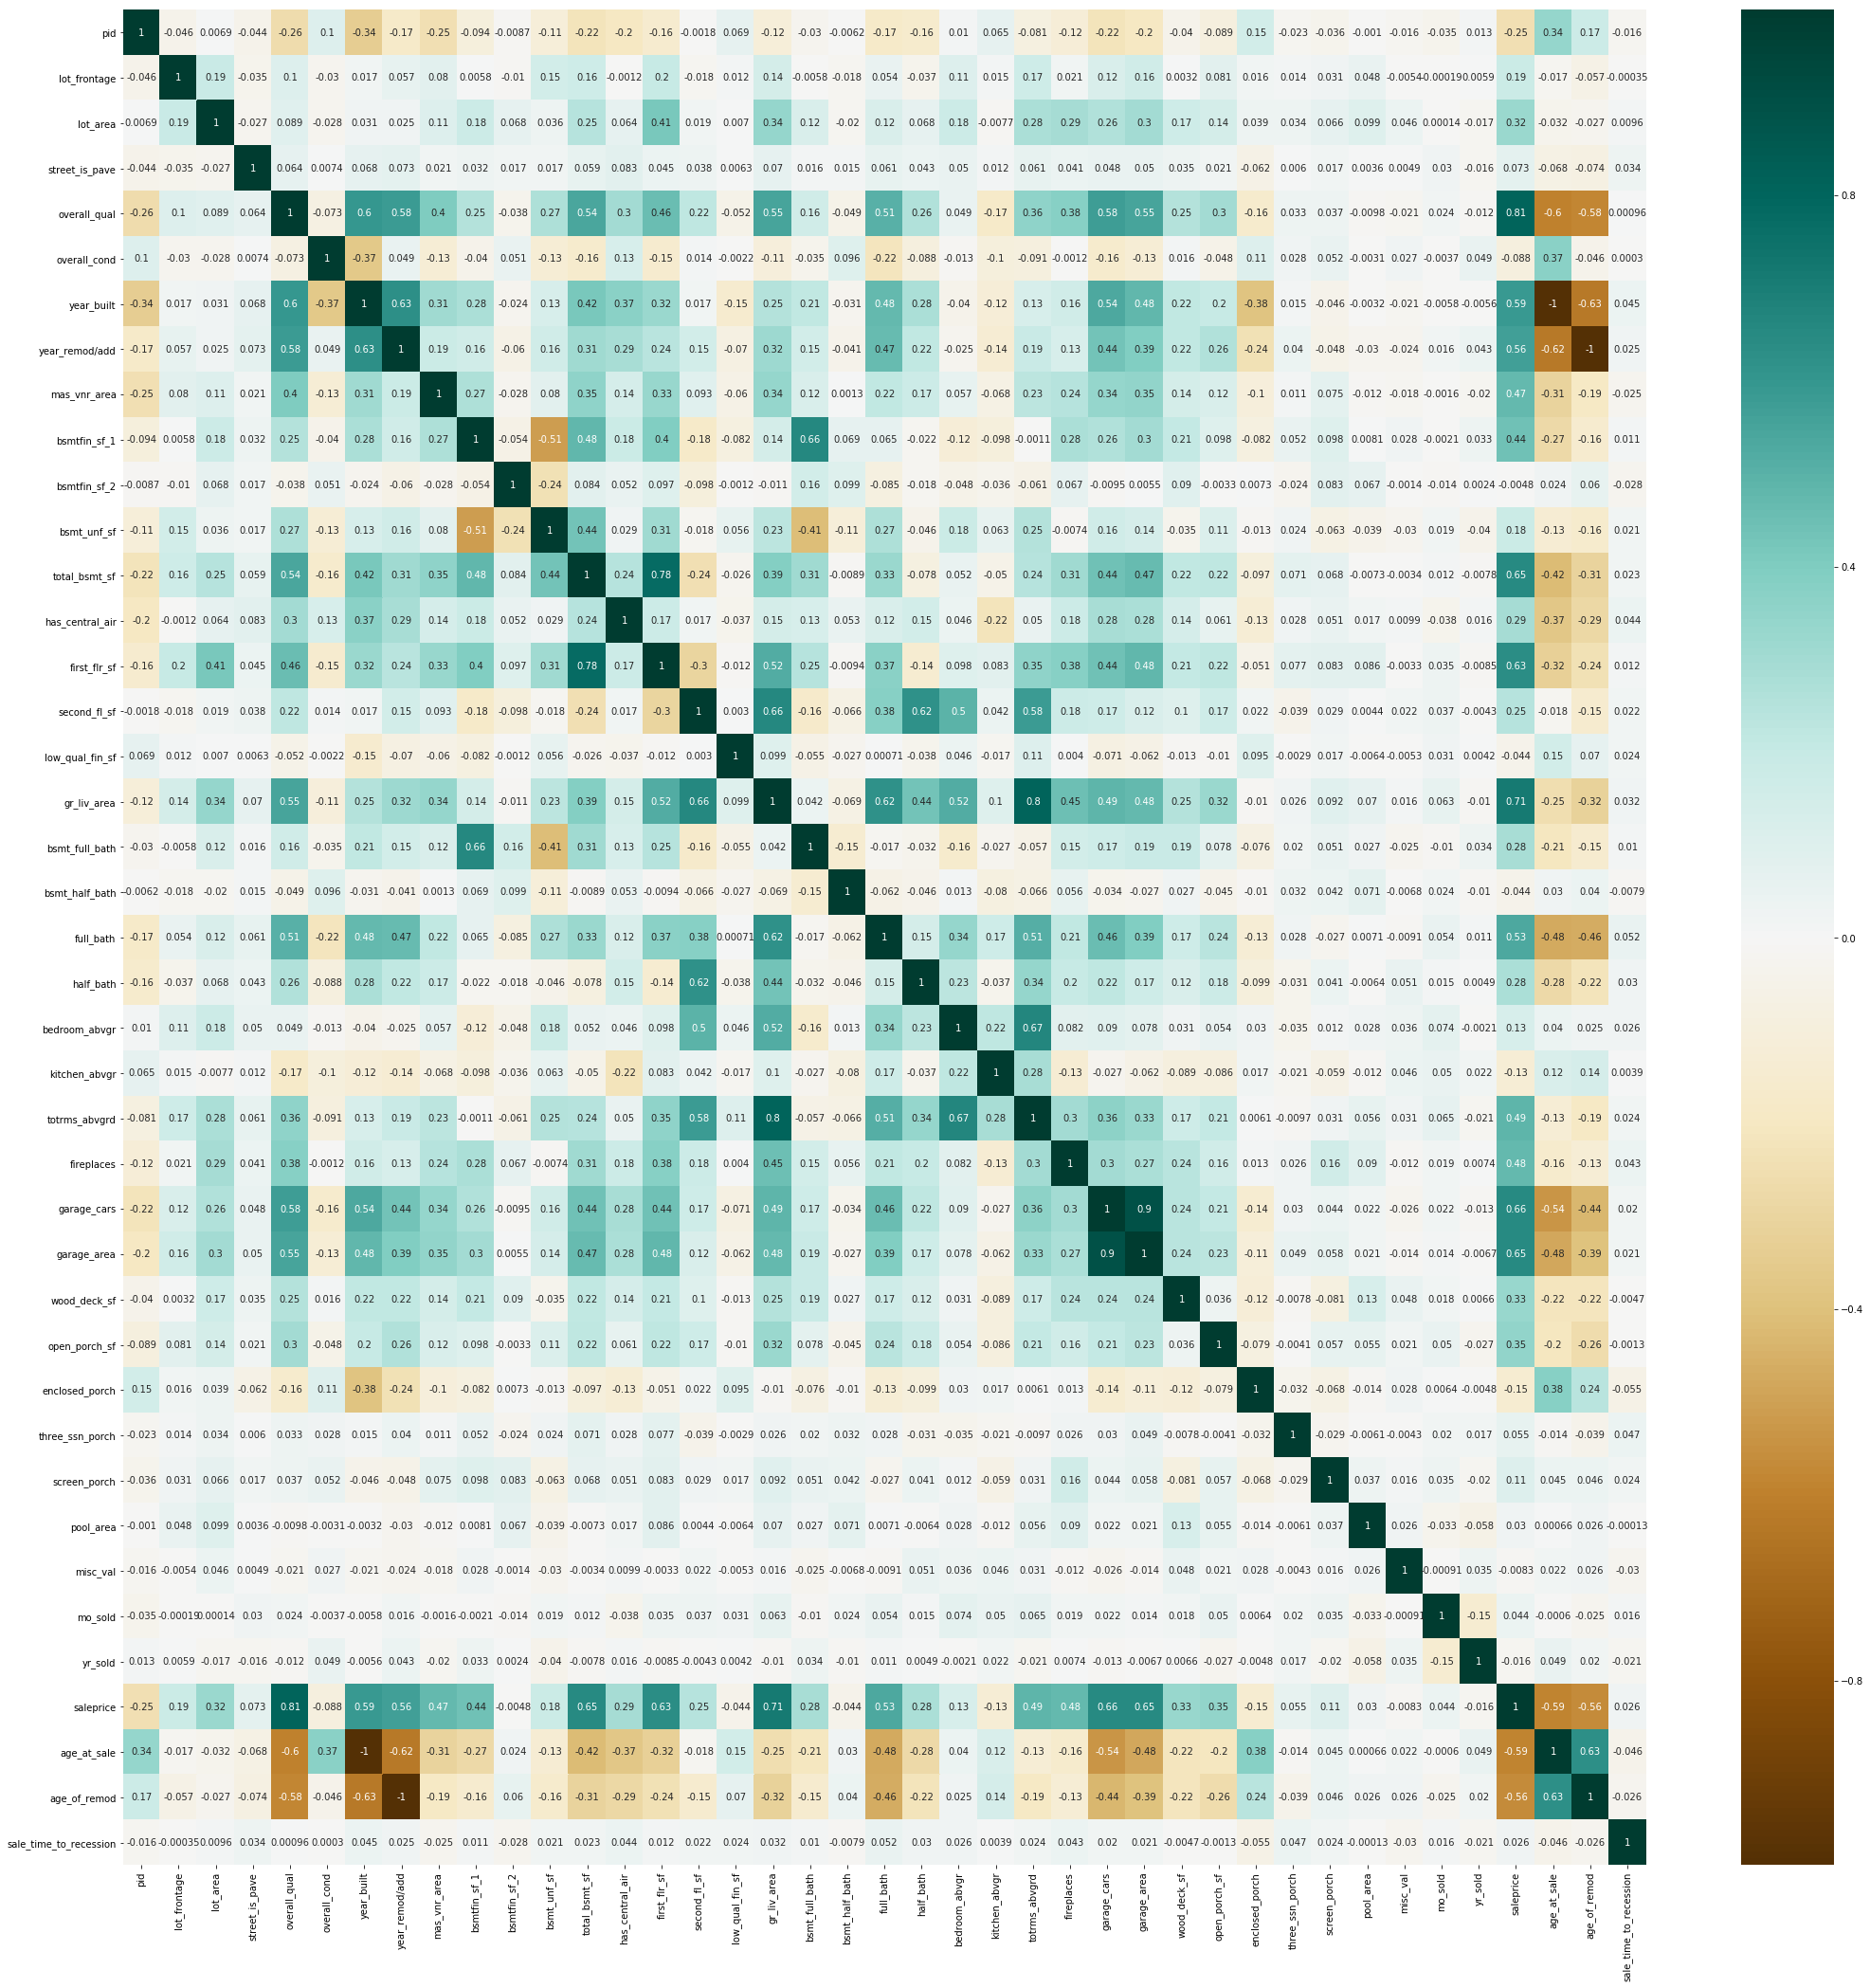

In [24]:
plt.figure(figsize=(36,36))
sns.heatmap(df.corr(),annot=True,cmap='BrBG');

#### Year Variable Histograms

In [ ]:
year_cols = ['year_built','year_remod/add','yr_sold']
fig, ax = plt.subplots(3,1,figsize=(10,14))
ax = ax.ravel()

for i, col in enumerate(year_cols):
    ax[i].hist(df[col], bins=20)
    ax[i].set_title(col.replace('_',' ').title(),fontsize=12)
    ax[i].set_ylabel('# of Houses')
    ax[i].set_xlabel('Year Bins')

In [ ]:
garage_yr_blt_vals = df[df['garage_yr_blt'].notnull()]['garage_yr_blt']

In [ ]:
garage_yr_blt_vals.index = range(len(garage_yr_blt_vals))

In [ ]:
garage_yr_blt_vals = garage_yr_blt_vals.astype(int)

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6),gridspec_kw = {'width_ratios':[11, 1]},sharey=True)
ax[0].set_title('Garage Year Built',fontsize=14)
ax[0].hist(garage_yr_blt_vals)
ax[0].set_ylabel('# Houses')
ax[0].set_xlabel('Year')

ax[1].set_title('No Garage',fontsize=14)
ax[1].bar(0, len(df[df['garage_yr_blt'].isnull()]))
ax[1].set_xlabel('NA')
ax[1].set_xticklabels('')

plt.suptitle('Garage Year Built',fontsize=18);

# Dummy Variables

### Dummy Models for Garage Age
##### Building categories: by x-percentile grouping

In [26]:
df['garage_age'] = df['yr_sold'] - df['garage_yr_blt']

In [27]:
df_to_pred['garage_age'] = df_to_pred['yr_sold'] - df_to_pred['garage_yr_blt']

In [28]:
df.garage_age.mean()

29.50919600630583

In [93]:
garage_nhood_test_results = pd.DataFrame(columns=['garage_num','nhood_num','lr_train_cvs','lasso_train_cvs',
                                                  'ridge_train_cvs','lr_test_r2','lasso_test_r2','ridge_test_r2'])

In [480]:
garage_num = 14
nhood_num = 14

### Manual dummies for garage_age

In [481]:
#pct_list = list(range(15,100,15)) - 181203 and earlier.  181204a was 10%
pct_list = list(range(garage_num,100,garage_num))

for i, pct in enumerate(pct_list):
    age_val = np.percentile(df[df.garage_age.notnull()].garage_age, pct)
    if i==0:
        col_name_str = 'garage_age_under_' + str(int(age_val))
        print(col_name_str)
        df[col_name_str] = df.garage_age.map(lambda x: 1 if x <= age_val else 0)
        df_to_pred[col_name_str] = df_to_pred.garage_age.map(lambda x: 1 if x <= age_val else 0)
    elif i<len(pct_list):
        col_name_str = 'garage_age_{}_{}'.format(str(int(age_val_prev+1)), str(int(age_val)))
        print(col_name_str)
        df[col_name_str] = df.garage_age.map(lambda x: 1 if (x>age_val_prev)&(x<=age_val) else 0)
        df_to_pred[col_name_str] = df_to_pred.garage_age.map(lambda x: 1 if (x>age_val_prev)&(x<=age_val) else 0)
    if i==len(pct_list)-1:
        col_name_str = 'garage_age_over_' + str(int(age_val+1))      
        print(col_name_str)
        df[col_name_str] = df.garage_age.map(lambda x: 1 if x > age_val else 0)
        df_to_pred[col_name_str] = df_to_pred.garage_age.map(lambda x: 1 if x > age_val else 0)
    age_val_prev = age_val

garage_age_under_2
garage_age_3_8
garage_age_9_17
garage_age_18_32
garage_age_33_43
garage_age_44_54
garage_age_55_87
garage_age_over_88


In [482]:
df['no_garage'] = df.garage_type.map(lambda x: 1 if x=='NA' else 0)
df_to_pred['no_garage'] = df_to_pred.garage_type.map(lambda x: 1 if x=='NA' else 0)

In [483]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,has_central_air,electrical,first_flr_sf,second_fl_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,...,nhood_med_249119_279440,nhood_med_213160_249119,nhood_med_199680_213160,nhood_med_190450_199680,nhood_med_181160_190450,nhood_med_157960_181160,nhood_med_140020_157960,nhood_med_136516_140020,nhood_med_130800_136516,nhood_med_120840_130800,nhood_med_101820_120840,nhood_med_abv_282282,nhood_med_263630_282282,nhood_med_221980_263630,nhood_med_202530_221980,nhood_med_196237_202530,nhood_med_188300_196237,nhood_med_180885_188300,nhood_med_157960_180885,nhood_med_140965_157960,nhood_med_137050_140965,nhood_med_135189_137050,nhood_med_124940_135189,nhood_med_111735_124940,nhood_med_97337_111735,garage_age_under_3,garage_age_4_11,garage_age_12_29,garage_age_30_42,garage_age_43_55,garage_age_over_56,garage_age_4_10,garage_age_11_26,garage_age_27_39,garage_age_40_51,garage_age_52_81,garage_age_over_82,garage_age_under_2,garage_age_3_9,garage_age_10_20,garage_age_21_35,garage_age_36_47,garage_age_48_65,garage_age_3_8,garage_age_9_17,garage_age_18_32,garage_age_33_43,garage_age_44_54,garage_age_55_87,garage_age_over_88
0,109,533352170,60,RL,0.0,13517,1,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,544,531379050,60,RL,43.0,11492,1,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,153,535304180,20,RL,68.0,7922,1,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,318,916386060,60,RL,73.0,9802,1,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,255,906425045,50,RL,82.0,14235,1,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [484]:
df_to_pred.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,has_central_air,electrical,first_flr_sf,second_fl_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,...,nhood_med_249119_279440,nhood_med_213160_249119,nhood_med_199680_213160,nhood_med_190450_199680,nhood_med_181160_190450,nhood_med_157960_181160,nhood_med_140020_157960,nhood_med_136516_140020,nhood_med_130800_136516,nhood_med_120840_130800,nhood_med_101820_120840,nhood_med_abv_282282,nhood_med_263630_282282,nhood_med_221980_263630,nhood_med_202530_221980,nhood_med_196237_202530,nhood_med_188300_196237,nhood_med_180885_188300,nhood_med_157960_180885,nhood_med_140965_157960,nhood_med_137050_140965,nhood_med_135189_137050,nhood_med_124940_135189,nhood_med_111735_124940,nhood_med_97337_111735,garage_age_under_3,garage_age_4_11,garage_age_12_29,garage_age_30_42,garage_age_43_55,garage_age_over_56,garage_age_4_10,garage_age_11_26,garage_age_27_39,garage_age_40_51,garage_age_52_81,garage_age_over_82,garage_age_under_2,garage_age_3_9,garage_age_10_20,garage_age_21_35,garage_age_36_47,garage_age_48_65,garage_age_3_8,garage_age_9_17,garage_age_18_32,garage_age_33_43,garage_age_44_54,garage_age_55_87,garage_age_over_88
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,0,FuseP,908,1020,0,1928,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,RL,0.0,9662,1,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,1,SBrkr,1967,0,0,1967,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,1,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,1,SBrkr,664,832,0,1496,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.0,8520,1,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,1,SBrkr,968,0,0,968,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,625,535105100,20,RL,0.0,9500,1,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,1,SBrkr,1394,0,0,1394,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


#### Manual Dummies for Neighborhood

In [485]:
#pct_list = list(range(85,0,-15)) - for 181203. 181204 used 10%
pct_list = list(range((100-nhood_num),0,-1*(nhood_num)))

nhood_vals = df.groupby('neighborhood')['saleprice'].median().sort_values(ascending=False)

for i, pct in enumerate(pct_list):
    price_val = np.percentile(nhood_vals, pct)
    if i==0:
        col_name_str = 'nhood_med_abv_' + str(int(price_val))
        print(col_name_str)
        df[col_name_str] = df.neighborhood.map(lambda x: 1 if (nhood_vals[x]>price_val) else 0)
        df_to_pred[col_name_str] = df_to_pred.neighborhood.map(lambda x: 1 if (nhood_vals[x]>price_val) else 0)
    elif i<len(pct_list):
        col_name_str = 'nhood_med_{}_{}'.format(str(int(price_val)), str(int(price_val_prev)))
        print(col_name_str)
        df[col_name_str] = df.neighborhood.map(lambda x: 1 if (nhood_vals[x]>=price_val)&(nhood_vals[x]<price_val_prev) else 0)
        df_to_pred[col_name_str] = df_to_pred.neighborhood.map(lambda x: 1 if (nhood_vals[x]>=price_val)&(nhood_vals[x]<price_val_prev) else 0)
    if i==len(pct_list)-1:
        col_name_str = 'nhood_med_below_' + str(int(price_val))      
        print(col_name_str)
        df[col_name_str] = df.neighborhood.map(lambda x: 1 if (nhood_vals[x]<price_val) else 0)
        df_to_pred[col_name_str] = df_to_pred.neighborhood.map(lambda x: 1 if (nhood_vals[x]<price_val) else 0)
    price_val_prev = price_val

nhood_med_abv_263630
nhood_med_202530_263630
nhood_med_188300_202530
nhood_med_157960_188300
nhood_med_137050_157960
nhood_med_124940_137050
nhood_med_97337_124940
nhood_med_below_97337


In [486]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,has_central_air,electrical,first_flr_sf,second_fl_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,...,nhood_med_249119_279440,nhood_med_213160_249119,nhood_med_199680_213160,nhood_med_190450_199680,nhood_med_181160_190450,nhood_med_157960_181160,nhood_med_140020_157960,nhood_med_136516_140020,nhood_med_130800_136516,nhood_med_120840_130800,nhood_med_101820_120840,nhood_med_abv_282282,nhood_med_263630_282282,nhood_med_221980_263630,nhood_med_202530_221980,nhood_med_196237_202530,nhood_med_188300_196237,nhood_med_180885_188300,nhood_med_157960_180885,nhood_med_140965_157960,nhood_med_137050_140965,nhood_med_135189_137050,nhood_med_124940_135189,nhood_med_111735_124940,nhood_med_97337_111735,garage_age_under_3,garage_age_4_11,garage_age_12_29,garage_age_30_42,garage_age_43_55,garage_age_over_56,garage_age_4_10,garage_age_11_26,garage_age_27_39,garage_age_40_51,garage_age_52_81,garage_age_over_82,garage_age_under_2,garage_age_3_9,garage_age_10_20,garage_age_21_35,garage_age_36_47,garage_age_48_65,garage_age_3_8,garage_age_9_17,garage_age_18_32,garage_age_33_43,garage_age_44_54,garage_age_55_87,garage_age_over_88
0,109,533352170,60,RL,0.0,13517,1,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,544,531379050,60,RL,43.0,11492,1,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,153,535304180,20,RL,68.0,7922,1,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,318,916386060,60,RL,73.0,9802,1,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,255,906425045,50,RL,82.0,14235,1,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [487]:
df_to_pred.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,has_central_air,electrical,first_flr_sf,second_fl_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,...,nhood_med_249119_279440,nhood_med_213160_249119,nhood_med_199680_213160,nhood_med_190450_199680,nhood_med_181160_190450,nhood_med_157960_181160,nhood_med_140020_157960,nhood_med_136516_140020,nhood_med_130800_136516,nhood_med_120840_130800,nhood_med_101820_120840,nhood_med_abv_282282,nhood_med_263630_282282,nhood_med_221980_263630,nhood_med_202530_221980,nhood_med_196237_202530,nhood_med_188300_196237,nhood_med_180885_188300,nhood_med_157960_180885,nhood_med_140965_157960,nhood_med_137050_140965,nhood_med_135189_137050,nhood_med_124940_135189,nhood_med_111735_124940,nhood_med_97337_111735,garage_age_under_3,garage_age_4_11,garage_age_12_29,garage_age_30_42,garage_age_43_55,garage_age_over_56,garage_age_4_10,garage_age_11_26,garage_age_27_39,garage_age_40_51,garage_age_52_81,garage_age_over_82,garage_age_under_2,garage_age_3_9,garage_age_10_20,garage_age_21_35,garage_age_36_47,garage_age_48_65,garage_age_3_8,garage_age_9_17,garage_age_18_32,garage_age_33_43,garage_age_44_54,garage_age_55_87,garage_age_over_88
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,0,FuseP,908,1020,0,1928,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,RL,0.0,9662,1,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,1,SBrkr,1967,0,0,1967,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,1,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,1,SBrkr,664,832,0,1496,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.0,8520,1,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,1,SBrkr,968,0,0,968,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,625,535105100,20,RL,0.0,9500,1,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,1,SBrkr,1394,0,0,1394,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


## Manual dummies % check: Garage Age/Neighborhood

In [488]:
lr = LinearRegression()
lasso = LassoCV(cv=3)
ridge = RidgeCV(cv=3)

In [489]:
check_feat = df._get_numeric_data().columns.tolist()
check_feat.remove('saleprice')

In [490]:
X = df[check_feat]
y = df['saleprice']

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=125)

In [492]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [493]:
pt = PowerTransformer()
X_train_sc_t = pt.fit_transform(X_train_sc)
X_test_sc_t = pt.transform(X_test_sc)

In [502]:
lr.fit(X_train_sc_t, y_train)

lasso.fit(X_train_sc_t, y_train)

ridge.fit(X_train_sc_t, y_train)

cvlr = cross_val_score(lr, X_train_sc_t, y_train, cv=7).mean()

cvlas = cross_val_score(lasso, X_train_sc_t, y_train, cv=7).mean()

cvrid = cross_val_score(ridge, X_train_sc_t, y_train, cv=7).mean()

lrr2 = r2_score(y_test, lr.predict(X_test_sc_t))

lasr2 = r2_score(y_test, lasso.predict(X_test_sc_t))

ridr2 = r2_score(y_test, ridge.predict(X_test_sc_t))

# Clock score results

In [503]:
new_row_data = {'garage_num':[garage_num],'nhood_num':[nhood_num],
                'lr_train_cvs':[cvlr],'lasso_train_cvs':[cvlas],
                'ridge_train_cvs':[cvrid],'lr_test_r2':[lrr2],
                'lasso_test_r2':[lasr2],'ridge_test_r2':[ridr2]}

new_row = pd.DataFrame(new_row_data, index=i_count)

In [504]:
new_row

,garage_num,nhood_num,lr_train_cvs,lasso_train_cvs,ridge_train_cvs,lr_test_r2,lasso_test_r2,ridge_test_r2
0,14,14,-4.108928e+17,0.882861,0.881444,0.878674,0.879346,0.878615


In [505]:
garage_nhood_test_results = garage_nhood_test_results.append(new_row)

In [506]:
garage_nhood_test_results

,garage_num,nhood_num,lr_train_cvs,lasso_train_cvs,ridge_train_cvs,lr_test_r2,lasso_test_r2,ridge_test_r2
0,18,18,8.784490e-01,0.879115,0.878273,0.876653,0.876980,0.876559
0,18,17,-2.934475e+20,0.879309,0.878477,0.877071,0.877376,0.876978
0,18,16,-1.331262e+20,0.880336,0.879892,0.878364,0.878513,0.878187
0,18,15,-1.099408e+17,0.880022,0.879639,0.877955,0.878324,0.877804
0,18,14,-8.161105e+17,0.882860,0.881922,0.881390,0.880335,0.880349
0,18,13,-1.899604e+22,0.882826,0.882140,0.876384,0.880299,0.880296
0,18,12,-3.245951e+19,0.882832,0.882091,0.880491,0.879946,0.880086
0,18,11,-1.154413e+20,0.882702,0.882744,0.877106,0.877196,0.876908
0,18,10,-1.456424e+20,0.882676,0.882731,0.877105,0.877191,0.876829
0,18,9,-1.019669e+19,0.883145,0.882660,0.877123,0.877333,0.876770


## Modeling Loop

In [539]:
df = pd.read_csv('./datasets/train_eda.csv',na_filter=False)

to_dt_cols = ['year_built','year_remod/add','yr_sold']

for col in to_dt_cols:
    dt_fmt = pd.to_datetime(df[col],format='%Y')
    df[col] = dt_fmt.dt.year

df.loc[df[df['garage_yr_blt']==''].index,'garage_yr_blt'] = pd.NaT
dt_fmt = pd.to_datetime(df.garage_yr_blt,format='%Y.%f')
df.loc[:,'garage_yr_blt'] = dt_fmt.dt.year
df.loc[df[df['garage_yr_blt'].isnull()].index,'garage_yr_blt'] = pd.NaT

df['garage_age'] = df['yr_sold'] - df['garage_yr_blt']

reset_df = df.copy()

garage_nhood_test_results = pd.DataFrame(columns=['garage_num','nhood_num','lr_train_cvs',
                                                  'lasso_train_cvs','ridge_train_cvs',
                                                  'lr_test_r2','lasso_test_r2',
                                                  'ridge_test_r2'])
lr = LinearRegression()
lasso = LassoCV(cv=3)
ridge = RidgeCV(cv=3)
ss = StandardScaler()
pt = PowerTransformer()

nhood_vals = df.groupby('neighborhood')['saleprice'].median().sort_values(ascending=False)

i_count = 0

for g in enumerate(range(10,21)):
    print(g)
    g_pct_list = list(range(g,100,g))
    
    for n in range(10,21):
        print(n)
        n_pct_list = list(range((100-n),0,n*-1))

        df = reset_df
        
        for i, g_pct in enumerate(g_pct_list):
            age_val = np.percentile(df[df.garage_age.notnull()].garage_age, g_pct)
            if i==0:
                col_name_str = 'garage_age_under_' + str(int(age_val))
                #print(col_name_str)
                df[col_name_str] = df.garage_age.map(lambda x: 1 if x <= age_val else 0)
                df_to_pred[col_name_str] = df_to_pred.garage_age.map(lambda x: 1 if x <= age_val else 0)
            elif i<len(pct_list):
                col_name_str = 'garage_age_{}_{}'.format(str(int(age_val_prev+1)), str(int(age_val)))
                #print(col_name_str)
                df[col_name_str] = df.garage_age.map(lambda x: 1 if (x>age_val_prev)&(x<=age_val) else 0)
                df_to_pred[col_name_str] = df_to_pred.garage_age.map(lambda x: 1 if (x>age_val_prev)&(x<=age_val) else 0)
            if i==len(pct_list)-1:
                col_name_str = 'garage_age_over_' + str(int(age_val+1))      
                #print(col_name_str)
                df[col_name_str] = df.garage_age.map(lambda x: 1 if x > age_val else 0)
                df_to_pred[col_name_str] = df_to_pred.garage_age.map(lambda x: 1 if x > age_val else 0)
            age_val_prev = age_val

        for j, n_pct in enumerate(n_pct_list):
            price_val = np.percentile(nhood_vals, n_pct)
            if j==0:
                col_name_str = 'nhood_med_abv_' + str(int(price_val))
                #print(col_name_str)
                df[col_name_str] = df.neighborhood.map(lambda x: 1 if (nhood_vals[x]>price_val) else 0)
                df_to_pred[col_name_str] = df_to_pred.neighborhood.map(lambda x: 1 if (nhood_vals[x]>price_val) else 0)
            elif j<len(n_pct_list):
                col_name_str = 'nhood_med_{}_{}'.format(str(int(price_val)), str(int(price_val_prev)))
                #print(col_name_str)
                df[col_name_str] = df.neighborhood.map(lambda x: 1 if (nhood_vals[x]>=price_val)&(nhood_vals[x]<price_val_prev) else 0)
                df_to_pred[col_name_str] = df_to_pred.neighborhood.map(lambda x: 1 if (nhood_vals[x]>=price_val)&(nhood_vals[x]<price_val_prev) else 0)
            if j==len(n_pct_list)-1:
                col_name_str = 'nhood_med_below_' + str(int(price_val))      
                #print(col_name_str)
                df[col_name_str] = df.neighborhood.map(lambda x: 1 if (nhood_vals[x]<price_val) else 0)
                df_to_pred[col_name_str] = df_to_pred.neighborhood.map(lambda x: 1 if (nhood_vals[x]<price_val) else 0)
            price_val_prev = price_val
            
        check_feat = df._get_numeric_data().columns.tolist()
        check_feat.remove('saleprice')
        
        X = df[check_feat]
        y = df['saleprice']
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=125)
        
        X_train_sc = ss.fit_transform(X_train)
        X_test_sc = ss.transform(X_test)
        X_train_sc_t = pt.fit_transform(X_train_sc)
        X_test_sc_t = pt.transform(X_test_sc)
        
        lr.fit(X_train_sc_t, y_train)
        lasso.fit(X_train_sc_t, y_train)
        ridge.fit(X_train_sc_t, y_train)

        lrscore = lr.score(X_train_sc_t, y_train)
        cvlas = cross_val_score(lasso, X_train_sc_t, y_train, cv=7).mean()
        cvrid = cross_val_score(ridge, X_train_sc_t, y_train, cv=7).mean()

        lrr2 = r2_score(y_test, lr.predict(X_test_sc_t))
        lasr2 = r2_score(y_test, lasso.predict(X_test_sc_t))
        ridr2 = r2_score(y_test, ridge.predict(X_test_sc_t))
        
        new_row_data = {'garage_num':[g],'nhood_num':[n],
                'lr_train_cvs':[lrscore],'lasso_train_cvs':[cvlas],
                'ridge_train_cvs':[cvrid],'lr_test_r2':[lrr2],
                'lasso_test_r2':[lasr2],'ridge_test_r2':[ridr2]}

        new_row = pd.DataFrame(new_row_data, index=[i_count])
        
        garage_nhood_test_results = garage_nhood_test_results.append(new_row)
        i_count += 1

10
10


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11
10


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12
10


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13
10


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14
10


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15
10


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16
10


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17
10


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18
10


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19
10


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20
10


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


11


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


12


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


13


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


14


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


15


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


16


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


17


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


18


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


19


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


20


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [545]:
garage_nhood_test_results['comp'] = (garage_nhood_test_results.lr_test_r2 + garage_nhood_test_results.lasso_test_r2 + garage_nhood_test_results.ridge_test_r2)/3

In [ ]:
garage_nhood_test_results.head()

In [547]:
garage_nhood_test_results.sort_values('comp',ascending=False)

,garage_num,nhood_num,lr_train_cvs,lasso_train_cvs,ridge_train_cvs,lr_test_r2,lasso_test_r2,ridge_test_r2,comp
1,11,15,0.902235,0.887014,0.887478,0.881581,0.881260,0.881471,0.881437
1,11,20,0.902235,0.887014,0.887478,0.881581,0.881260,0.881471,0.881437
1,11,16,0.902235,0.887014,0.887478,0.881581,0.881260,0.881471,0.881437
1,11,19,0.902235,0.887014,0.887478,0.881581,0.881260,0.881471,0.881437
1,11,14,0.902235,0.887014,0.887478,0.881581,0.881260,0.881471,0.881437
1,11,13,0.902235,0.887014,0.887478,0.881581,0.881260,0.881471,0.881437
1,11,12,0.902235,0.887014,0.887478,0.881581,0.881260,0.881471,0.881437
1,11,11,0.902235,0.887014,0.887478,0.881581,0.881260,0.881471,0.881437
1,11,10,0.902235,0.887014,0.887478,0.881581,0.881260,0.881471,0.881437
1,11,17,0.902235,0.887014,0.887478,0.881581,0.881260,0.881471,0.881437


##### Dummies for 'ms_zoning'

In [ ]:
df.ms_zoning.value_counts()

In [ ]:
df_to_pred.ms_zoning.value_counts()

In [19]:
zone_temp_df = pd.get_dummies(df, columns=['ms_zoning'])

In [20]:
zone_temp_df_to_pred = pd.get_dummies(df_to_pred, columns=['ms_zoning'])

In [ ]:
zone_temp_df.columns.tolist()

In [ ]:
zone_temp_df_to_pred.columns.tolist()

In [21]:
col_list = ['ms_zoning_C (all)','ms_zoning_FV','ms_zoning_I (all)',
            'ms_zoning_RH','ms_zoning_RL','ms_zoning_RM']

for col in col_list:
    df[col] = zone_temp_df[col]
    df_to_pred[col] = zone_temp_df_to_pred[col]

In [ ]:
df.head()

In [ ]:
df_to_pred.head()

##### Dummies for Bldg Type, House Style

In [22]:
df = pd.get_dummies(df, columns=['bldg_type','house_style'])

In [23]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['bldg_type','house_style'])

#### Dummies for Foundation

In [ ]:
#df.foundation.value_counts()

In [25]:
df = pd.get_dummies(df,columns=['foundation'])

In [ ]:
#df_to_pred.foundation.value_counts()

In [26]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['foundation'])

In [ ]:
#df.columns.tolist()

In [ ]:
df.fireplace_qu.value_counts()

In [ ]:
df_to_pred.fireplace_qu.value_counts()

In [27]:
df = pd.get_dummies(df, columns=['fireplace_qu'])
df_to_pred = pd.get_dummies(df_to_pred, columns=['fireplace_qu'])

#### Dummies for Electrical

In [ ]:
#pd.get_dummies(df, columns=['heating_qc']).columns.tolist()

In [ ]:
#pd.get_dummies(df_to_pred, columns=['electrical']).columns.tolist()

In [28]:
df = pd.get_dummies(df, columns=['heating_qc'])
df.drop('heating_qc_Po',axis=1,inplace=True)

In [29]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['heating_qc'])

In [ ]:
#df.head()

In [ ]:
#df_to_pred.head()

In [30]:
df = pd.get_dummies(df, columns=['electrical'])

In [31]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['electrical'])

In [32]:
df_to_pred = df_to_pred.rename({'electrical_NA':'electrical_Mix'},axis=1)
df_to_pred['electrical_Mix'] = 0

In [34]:
#df_to_pred.insert(df.columns.get_loc('functional_Typ')-2,'functional_Sev',0)
df_to_pred['functional_Sev'] = 0

In [35]:
#df_to_pred.insert(df.columns.get_loc('functional_Typ')-2,'functional_Sal',0)
df_to_pred['functional_Sal'] = 0

In [ ]:
df_to_pred.head()

#### Dummies for Garage Type, Misc Feature

In [36]:
df = pd.get_dummies(df, columns=['garage_type','misc_feature'])

In [37]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['garage_type','misc_feature'])

In [38]:
df_to_pred['misc_feature_TenC'] = 0

#### n-D Dummies for MS Subclass 

MS Subclass Data Dictionary:
```
20 1-STORY 1946 & NEWER ALL STYLES
30 1-STORY 1945 & OLDER
40 1-STORY W/FINISHED ATTIC ALL AGES
45 1-1/2 STORY - UNFINISHED ALL AGES
50 1-1/2 STORY FINISHED ALL AGES
60 2-STORY 1946 & NEWER
70 2-STORY 1945 & OLDER
75 2-1/2 STORY ALL AGES
80 SPLIT OR MULTI-LEVEL
85 SPLIT FOYER
90 DUPLEX - ALL STYLES AND AGES
120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150 1-1/2 STORY PUD - ALL AGES
160 2-STORY PUD - 1946 & NEWER
180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190 2 FAMILY CONVERSION - ALL STYLES AND AGES
```

In [ ]:
df.ms_subclass.value_counts()

In [39]:
subclass_dict = {
    '20': '1-STORY 1946 & NEWER ALL STYLES',
    '30': '1-STORY 1945 & OLDER',
    '40': '1-STORY W/ FINISHED ATTIC ALL AGES',
    '45': '1-HALF STORY - UNFINISHED ALL AGES',
    '50': '1-HALF STORY FINISHED ALL AGES',
    '60': '2-STORY 1946 & NEWER',
    '70': '2-STORY 1945 & OLDER',
    '75': '2-HALF STORY ALL AGES',
    '80': 'SPLIT OR MULTI-LEVEL',
    '85': 'SPLIT FOYER',
    '90': 'DUPLEX - ALL STYLES AND AGES',
    '120': '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    '150': '1-HALF STORY PUD - ALL AGES',
    '160': '2-STORY PUD - 1946 & NEWER',
    '180': 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    '190': '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

In [40]:
subclass_col_dict = {
    'is_1_story':'1-STORY',
    'is_1_hf_story':'1-HALF STORY',
    'is_2_story':'2-STORY',
    'is_2_hf_story':'2-HALF STORY',
    'is_split_multi':'SPLIT',
    'is_duplex':'DUPLEX',
    'is_pud':'PUD',
    'is_2_fm_conv':'FAMILY CONVERSION',
    'is_pre_war':'1945',
    'is_post_war':'1946',
    'has_finished_attic':' FINISHED '
}

In [ ]:
subclass_col_dict['is_1_story']

In [41]:
subclass_dummy_df = pd.DataFrame()
subclass_dummy_df['id'] = df.id

In [42]:
for col in subclass_col_dict:
    subclass_dummy_df[col] = df.ms_subclass.map(lambda x: 1 if subclass_col_dict[col] in subclass_dict[x] else 0)
    print(col)

is_1_story
is_1_hf_story
is_2_story
is_2_hf_story
is_split_multi
is_duplex
is_pud
is_2_fm_conv
is_pre_war
is_post_war
has_finished_attic


In [43]:
subclass_dummy_df.head()

,id,is_1_story,is_1_hf_story,is_2_story,is_2_hf_story,is_split_multi,is_duplex,is_pud,is_2_fm_conv,is_pre_war,is_post_war,has_finished_attic
0,109,0,0,1,0,0,0,0,0,0,1,0
1,544,0,0,1,0,0,0,0,0,0,1,0
2,153,1,0,0,0,0,0,0,0,0,1,0
3,318,0,0,1,0,0,0,0,0,0,1,0
4,255,0,1,0,0,0,0,0,0,0,0,1


In [44]:
df = df.merge(subclass_dummy_df, on='id')

In [45]:
subclass_dummy_df = pd.DataFrame()
subclass_dummy_df['id'] = df_to_pred.id

In [46]:
for col in subclass_col_dict:
    subclass_dummy_df[col] = df_to_pred.ms_subclass.map(lambda x: 1 if subclass_col_dict[col] in subclass_dict[x] else 0)
    print(col)

is_1_story
is_1_hf_story
is_2_story
is_2_hf_story
is_split_multi
is_duplex
is_pud
is_2_fm_conv
is_pre_war
is_post_war
has_finished_attic


In [47]:
subclass_dummy_df.head()

,id,is_1_story,is_1_hf_story,is_2_story,is_2_hf_story,is_split_multi,is_duplex,is_pud,is_2_fm_conv,is_pre_war,is_post_war,has_finished_attic
0,2658,0,0,0,0,0,0,0,1,0,0,0
1,2718,0,0,0,0,0,1,0,0,0,0,0
2,2414,0,0,1,0,0,0,0,0,0,1,0
3,1989,1,0,0,0,0,0,0,0,1,0,0
4,625,1,0,0,0,0,0,0,0,0,1,0


In [48]:
df_to_pred = df_to_pred.merge(subclass_dummy_df, on='id')

##### Dummies for Sale Type

In [49]:
df = pd.get_dummies(df, columns=['sale_type'])

In [50]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['sale_type'])

In [51]:
df_to_pred.drop('sale_type_VWD',axis=1,inplace=True)

##### Exterior dummies

In [63]:
df = pd.get_dummies(df, columns=['exterior_1st','exterior_2nd','condition_1','condition_2'])

In [64]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['exterior_1st','exterior_2nd','condition_1','condition_2'])

In [66]:
df = pd.get_dummies(df, columns=['mas_vnr_type'])

In [67]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['mas_vnr_type'])

##### Dummies Roof Style / Matl

In [54]:
df = pd.get_dummies(df, columns=['roof_style','roof_matl'])

In [55]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['roof_style','roof_matl'])

In [56]:
df_to_pred.drop('roof_matl_Metal',axis=1,inplace=True)

In [57]:
df_to_pred['roof_matl_Membran'] = 0

In [68]:
df.columns.tolist()

['id',
 'pid',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street_is_pave',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'has_central_air',
 'first_flr_sf',
 'second_fl_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 'three_ssn_porch',
 'screen_porch',
 'pool_area',
 'pool_qc',
 'fence',
 'misc_val',
 'mo_sold',


## Corr check for dummies to rank dictionaries

In [69]:
cat_df_list = []

cond_df = pd.DataFrame(df[['condition_1_Artery',
 'condition_1_Feedr',
 'condition_1_Norm',
 'condition_1_PosA',
 'condition_1_PosN',
 'condition_1_RRAe',
 'condition_1_RRAn',
 'condition_1_RRNe',
 'condition_1_RRNn',
 'condition_2_Artery',
 'condition_2_Feedr',
 'condition_2_Norm',
 'condition_2_PosA',
 'condition_2_PosN',
 'condition_2_RRAe',
 'condition_2_RRAn',
 'condition_2_RRNn','saleprice']])
cat_df_list.append(cond_df)

bt_df = pd.DataFrame(df[['bldg_type_1Fam',
 'bldg_type_2fmCon',
 'bldg_type_Duplex',
 'bldg_type_Twnhs',
 'bldg_type_TwnhsE','saleprice']])
cat_df_list.append(bt_df)

hs_df = pd.DataFrame(df[['house_style_1.5Fin',
 'house_style_1.5Unf',
 'house_style_1Story',
 'house_style_2.5Fin',
 'house_style_2.5Unf',
 'house_style_2Story',
 'house_style_SFoyer',
 'house_style_SLvl','saleprice']])
cat_df_list.append(hs_df)

roof_df = pd.DataFrame(df[['roof_style_Flat',
 'roof_style_Gable',
 'roof_style_Gambrel',
 'roof_style_Hip',
 'roof_style_Mansard',
 'roof_style_Shed',
 'roof_matl_CompShg',
 'roof_matl_Membran',
 'roof_matl_Tar&Grv',
 'roof_matl_WdShake',
 'roof_matl_WdShngl','saleprice']])
cat_df_list.append(roof_df)

ext_df = pd.DataFrame(df[['exterior_1st_AsbShng',
 'exterior_1st_AsphShn',
 'exterior_1st_BrkComm',
 'exterior_1st_BrkFace',
 'exterior_1st_CBlock',
 'exterior_1st_CemntBd',
 'exterior_1st_HdBoard',
 'exterior_1st_ImStucc',
 'exterior_1st_MetalSd',
 'exterior_1st_Plywood',
 'exterior_1st_Stone',
 'exterior_1st_Stucco',
 'exterior_1st_VinylSd',
 'exterior_1st_Wd Sdng',
 'exterior_1st_WdShing',
 'exterior_2nd_AsbShng',
 'exterior_2nd_AsphShn',
 'exterior_2nd_Brk Cmn',
 'exterior_2nd_BrkFace',
 'exterior_2nd_CBlock',
 'exterior_2nd_CmentBd',
 'exterior_2nd_HdBoard',
 'exterior_2nd_ImStucc',
 'exterior_2nd_MetalSd',
 'exterior_2nd_Plywood',
 'exterior_2nd_Stone',
 'exterior_2nd_Stucco',
 'exterior_2nd_VinylSd',
 'exterior_2nd_Wd Sdng',
 'exterior_2nd_Wd Shng','mas_vnr_type_BrkCmn',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_None',
 'mas_vnr_type_Stone','saleprice']])
cat_df_list.append(ext_df)

elec_df = pd.DataFrame(df[['electrical_FuseA',
 'electrical_FuseF',
 'electrical_FuseP',
 'electrical_Mix',
 'electrical_SBrkr','saleprice']])
cat_df_list.append(elec_df)

fdn_df = pd.DataFrame(df[['foundation_BrkTil',
 'foundation_CBlock',
 'foundation_PConc',
 'foundation_Slab',
 'foundation_Stone',
 'foundation_Wood','saleprice']])
cat_df_list.append(fdn_df)

gtm_df = pd.DataFrame(df[['garage_type_2Types',
 'garage_type_Attchd',
 'garage_type_Basment',
 'garage_type_BuiltIn',
 'garage_type_CarPort',
 'garage_type_Detchd',
 'garage_type_NA',
 'misc_feature_Gar2',
 'misc_feature_NA',
 'misc_feature_Othr',
 'misc_feature_Shed',
 'misc_feature_TenC','saleprice']])
cat_df_list.append(gtm_df)

st_df = pd.DataFrame(df[['sale_type_COD',
 'sale_type_CWD',
 'sale_type_Con',
 'sale_type_ConLD',
 'sale_type_ConLI',
 'sale_type_ConLw',
 'sale_type_New',
 'sale_type_Oth',
 'sale_type_WD ','saleprice']])
cat_df_list.append(st_df)

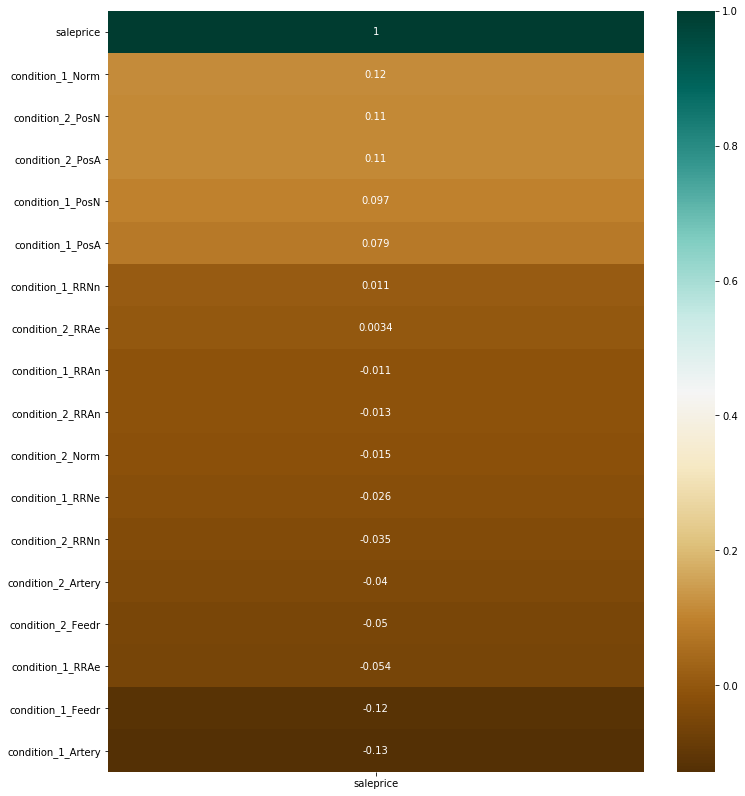

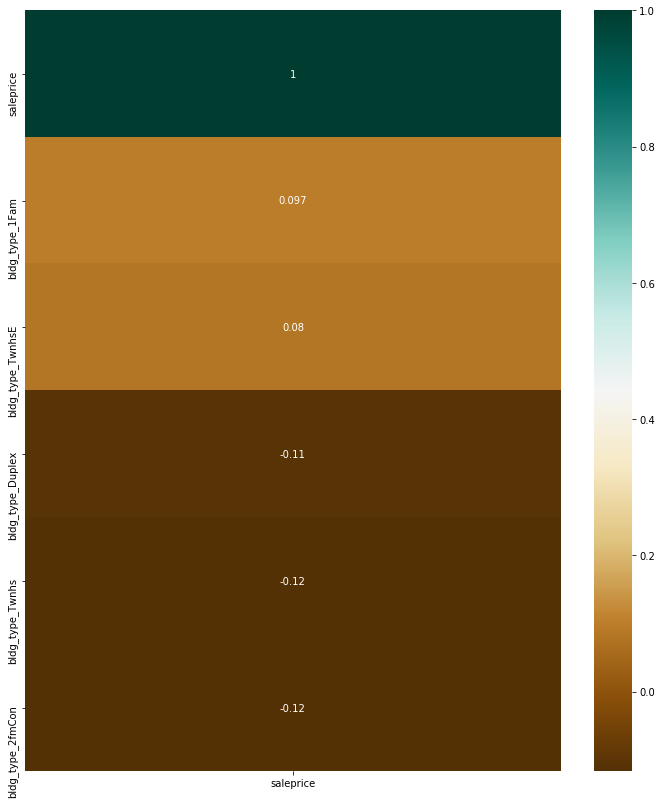

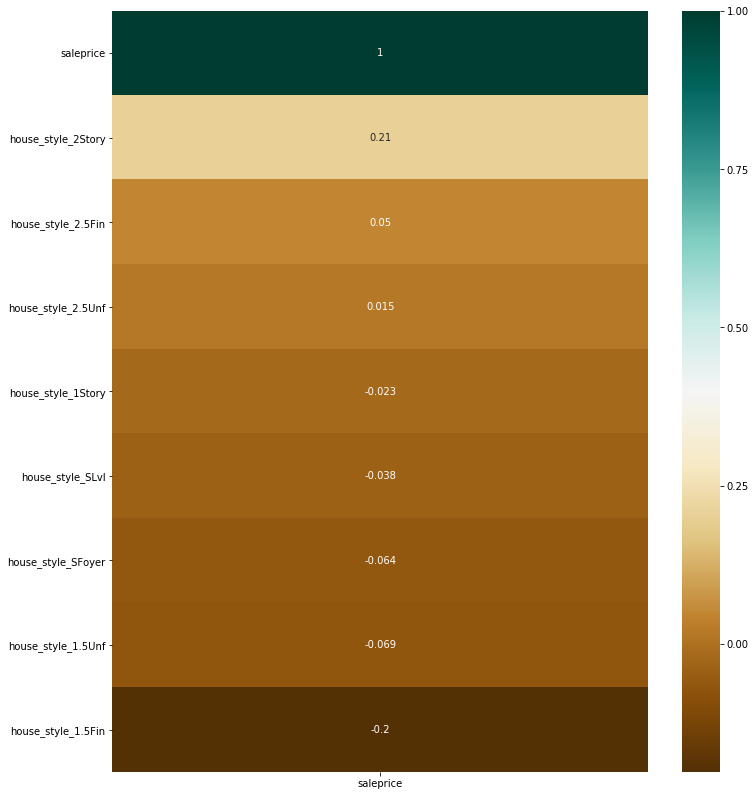

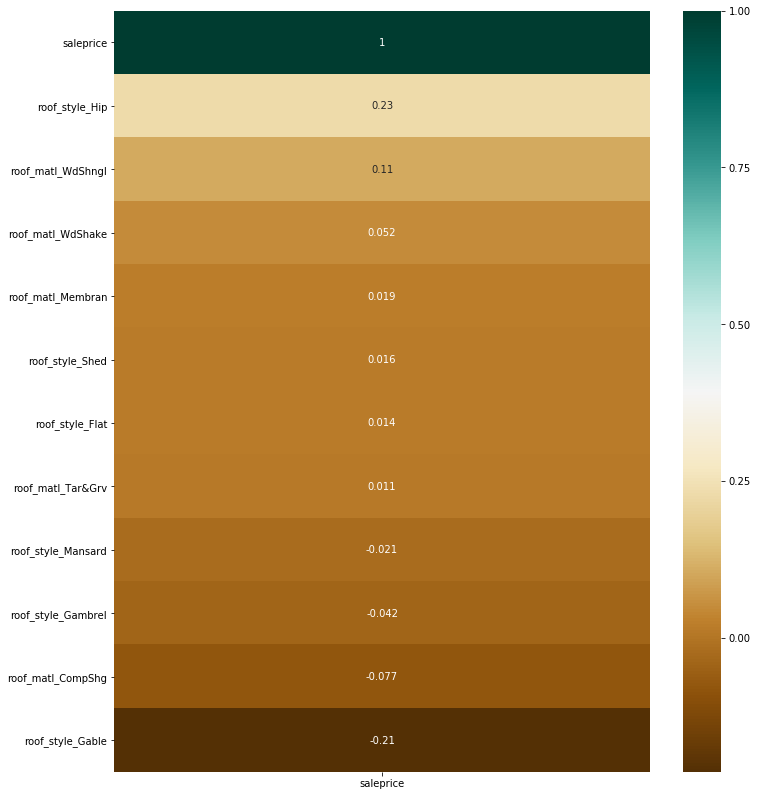

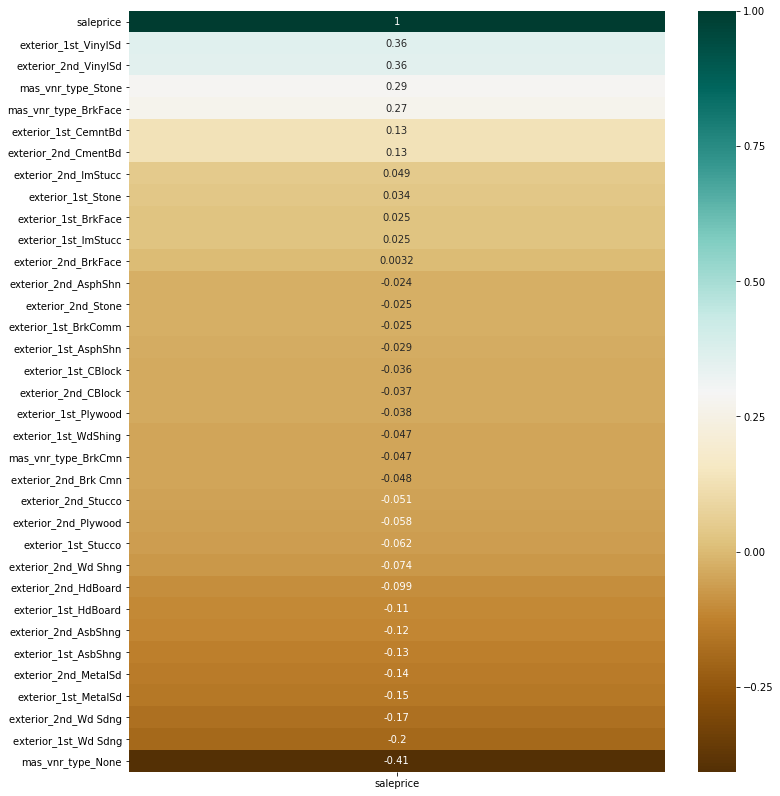

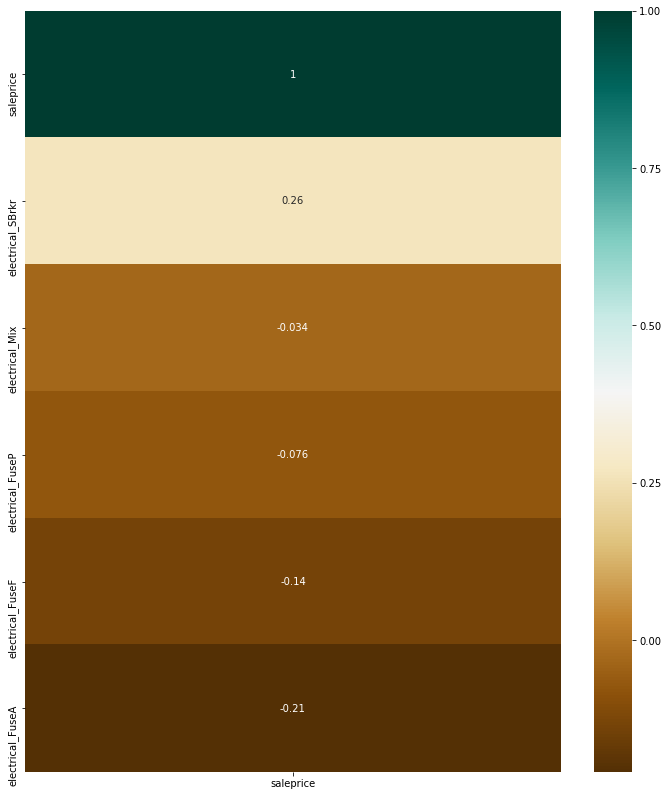

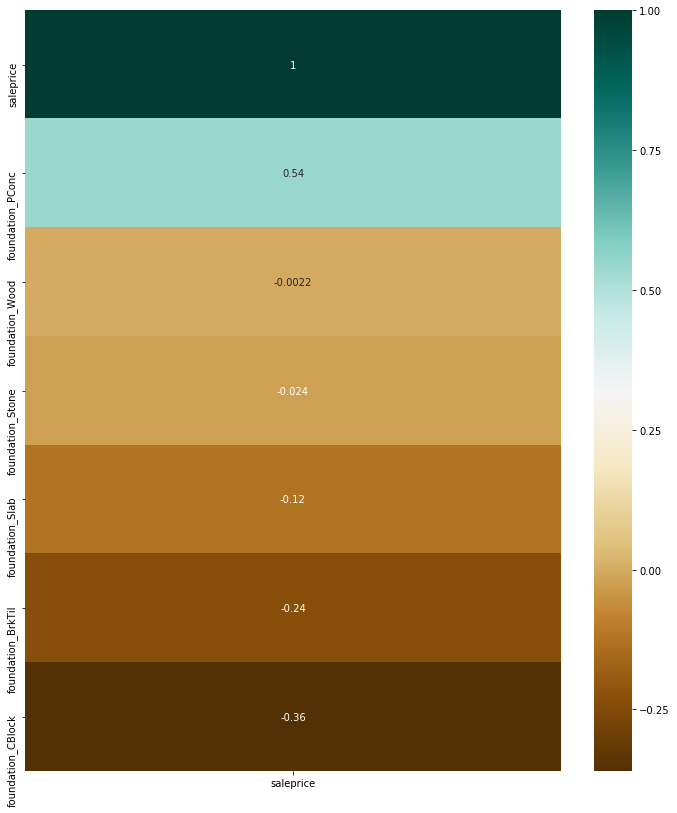

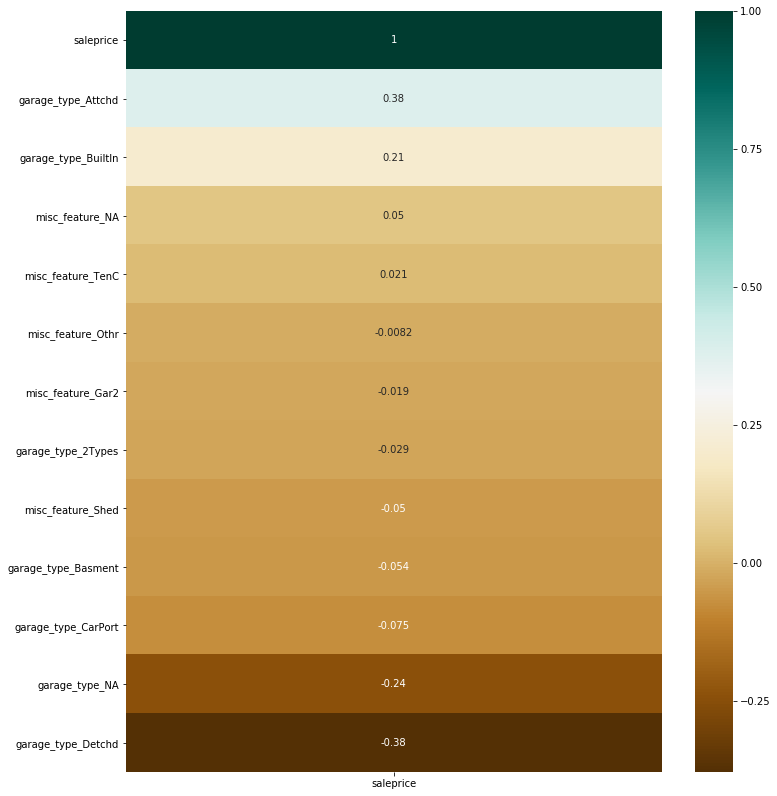

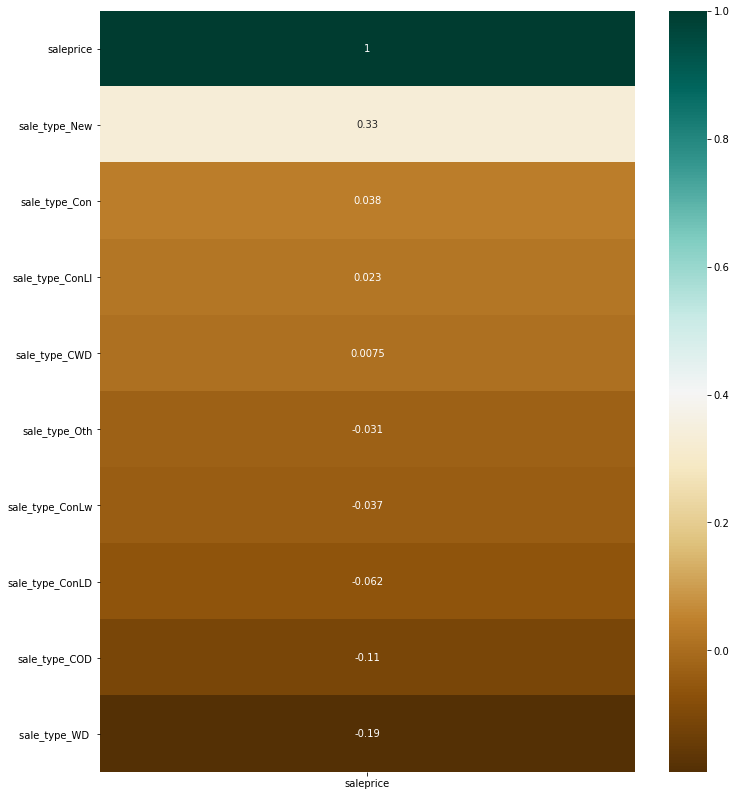

In [73]:
for c_df in cat_df_list:
    plt.figure(figsize=(12,14))
    sns.heatmap(c_df.corr()[['saleprice']].sort_values('saleprice',ascending=False),annot=True,cmap="BrBG");

### Dictionaries for ordinal ratings

In [ ]:
link_d = {
    'qual':['fireplace_qu','exter_qual','exter_cond','heating_qc','kitchen_qual',
             'bsmt_qual','pool_qc','garage_qual','garage_cond'],
    'fence':['fence'],
    'paved_drive':['paved_drive'],
    'garage_finish':['garage_finish'],
    'bsmtfin':['bsmtfin_type_1','bsmtfin_type_2'],
    'bsmt_exposure':['bsmt_exposure'],
    'lot_shape':['lot_shape'],
    'land_contour':['land_contour'],
    'utilities':['utilities'],
    'land_slope':['land_slope'],
    'condition':['condition_1','condition_2'],
    'bldg_type':['bldg_type'],
    'house_style':['house_style'],
    'roof_style':['roof_style'],
    'roof_matl':['roof_matl'],
    'exterior':['exterior_1st','exterior_2nd','mas_vnr_type']
}

dod = {
    'qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
    'fence':{'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0},
    'paved_drive':{'Y':2,'P':1,'N':0},
    'garage_finish':{'Fin':3,'RFn':2,'Unf':1,'NA':0},
    'bsmtfin':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},
    'bsmt_exposure':{'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0},
    'lot_shape':{'Reg':0,'IR1':-1,'IR2':-2,'IR3':-3},
    'land_contour':{'Lvl':0,'Bnk':-1,'HLS':-2,'Low':-3},
    'utilities':{'AllPub':0,'NoSewr':-1,'NoSeWa':-2,'ELO':-3},
    'land_slope':{'Gtl':0,'Mod':-1,'Sev':-2},
    'condition':{'PosA':3,'PosN':2,'Norm':1,'Feedr':-2,'Artery':-3,'RRNn':0,'RRAn':-1,'RRNe':0,'RRAe':-1},
    'bldg_type':{'1Fam':2,'TwnhseE':1,'Twnhs':-1,'Duplex':0,'2fmCon':-1},
    'house_style':{'1Story':0,'1.5Unf':-2,'1.5Fin':-3,'2Story':3,'2.5Unf':1,'2.5Fin':2,'SLvl':-1,'SFoyer':-2},
    'roof_style':{'Gable':-2,'Hip':2,'Flat':1,'Gambrel':-1,'Mansard'0:,'Shed':1},
    'roof_matl':{'CompShg':-2,'Tar&Grv':-1,'WdShngl':-2,'WdShake':1,'Membran':0,'Metal':-5,'Roll':-3},
    'exterior':{'VinylSd':4,'MetalSd':3,'HdBoard':-4,'Wd Sdng':-6,'Plywood':-1,'CemntBd':3,'BrkFace':1,
                'WdShing':1,'AsbShng':-5,'Stucco'-3:,'BrkComm':0,'CBlock':-1,'Stone':2,'AsphShn':0,
                'ImStucc':1,'PreCast':-4,'Other':0},
    'foundation':{'PConc':1,'CBlock':,'BrkTil':,'Slab':,'Stone':,'Wood':}
}

In [ ]:
df.foundation.value_counts()

In [ ]:
df_to_pred.foundation.value_counts()

In [ ]:
df.mas_vnr_type.value_counts()

In [ ]:
df_to_pred.mas_vnr_type.value_counts()

In [ ]:
cols_for_dict = ['fireplace_qu','exter_qual','exter_cond','heating_qc',
                 'kitchen_qual','bsmt_qual','pool_qc','garage_qual','garage_cond',
                 'fence','paved_drive','garage_finish','bsmt_exposure','lot_shape',
                 'land_contour','utilities','land_slope','condition_1','condition_2',
                 'bldg_type','house_style','roof_style','roof_matl','exterior_1st',
                 'exterior_2nd','mas_vnr_type']


In [ ]:
dod['qual']['Ex']

In [ ]:
dict_list = ['qual','fence','paved_drive','garage_finish','bsmtfin','bsmt_exposure',
             'lot_shape','land_contour','utilities','land_slope','condition',
             'bldg_type','house_style','roof_style','roof_matl','exterior']

for col in cols_for_dict:
    for dc in dict_list:      
        if col in link_d[dc]:
            print(dc, col)
            print(dod[dc])
            df[col] = df[col].map(lambda x: dod[dc][x])
            df_to_pred[col] = df_to_pred[col].map(lambda x: dod[dc][x])

In [ ]:
df.columns.tolist()

### Save DFs with Dummies to Files

In [ ]:
# df.to_csv('./datasets/train_eda_dummies.csv',index_label=False)
# df_to_pred.to_csv('./datasets/test_eda_dummies.csv',index_label=False)

### Save DFs with Dummies and Ordinals

In [ ]:
df.to_csv('./datasets/train_eda_dummies_ord.csv',index_label=False)
df_to_pred.to_csv('./datasets/test_eda_dummies_ord.csv',index_label=False)

# CHECKPOINT 2 - DUMMIES ADDED

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score

%matplotlib inline

### Load just dummies

In [ ]:
#df = pd.read_csv('./datasets/train_eda_dummies.csv',na_filter=False)
#df_to_pred = pd.read_csv('./datasets/test_eda_dummies.csv',na_filter=False)
#df_removed = pd.read_csv('./datasets/train_removed.csv',na_filter=False)

### Load dummies and ordinal

In [ ]:
df = pd.read_csv('./datasets/train_eda_dummies_ord.csv',na_filter=False)
df_to_pred = pd.read_csv('./datasets/test_eda_dummies_ord.csv',na_filter=False)
df_removed = pd.read_csv('./datasets/train_removed.csv',na_filter=False)

##### Adjust Pandas Max Rows/Columns

In [ ]:
pd.options.display.max_columns = 101
pd.options.display.max_rows = 2101

In [ ]:
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")

### Result Plots

In [ ]:
plt.figure(figsize=(14,52))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice',ascending=False),annot=True,cmap='BrBG');

In [ ]:
df.columns.tolist()

In [ ]:
corr_list = ['saleprice','overall_qual','gr_liv_area',
             'garage_area','first_flr_sf','age_at_sale']

In [ ]:
counter = 0
corr_df = pd.DataFrame()
corr_df_names = pd.DataFrame()

for col in df.columns.tolist():
    if counter <= 12:
        try:
            for row in corr_list:
                corr_df.loc[row,col] = np.corrcoef(df[row],df[col])[0,1] # Return top-right corr value in np matrix
                corr_df_names.loc[row,col] = '{}__{}'.format(row, col) # Store column names in dataframe to assign
            counter += 1
        except:
            continue    
    else:       
        plt.figure(figsize=(16,8))
        sns.heatmap(corr_df,annot=True,cmap='BrBG');
        
        corr_df = pd.DataFrame()
        corr_df_names = pd.DataFrame()
        counter = 0

In [ ]:
sns.pairplot(df[corr_list]);

# Modeling

In [ ]:
poly = PolynomialFeatures(include_bias=False)

In [ ]:
poly_cols = df.corr()[['saleprice']].sort_values('saleprice',ascending=False).iloc[0:15].index.tolist()

In [ ]:
poly_cols.remove('saleprice')

### Checking Polynomial Correlation Values

In [ ]:
X = df[poly_cols]
y = df['saleprice']

In [ ]:
X_poly_temp = poly.fit_transform(X)

In [ ]:
temp_df = pd.DataFrame(X_poly_temp, columns=poly.get_feature_names(poly_cols))
temp_df['saleprice']=df['saleprice']

In [ ]:
print(temp_df.corr()[['saleprice']].sort_values('saleprice',ascending=False))

### PolynomialFeatures into DFs

In [ ]:
p_features = poly_cols
X = df[p_features]
y = df['saleprice']

In [ ]:
X_poly = poly.fit_transform(X)

In [ ]:
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(p_features))

In [ ]:
X_poly_df.drop(p_features,axis=1,inplace=True)

In [ ]:
X_poly_df['id'] = df.id

In [ ]:
df = df.merge(X_poly_df, on='id')

In [ ]:
df.head()

In [ ]:
X_pred_poly = poly.transform(df_to_pred[p_features])

In [ ]:
X_pred_poly_df = pd.DataFrame(X_pred_poly, columns=poly.get_feature_names(p_features))

In [ ]:
X_pred_poly_df.drop(p_features,axis=1,inplace=True)

In [ ]:
X_pred_poly_df['id'] = df_to_pred.id

In [ ]:
df_to_pred = df_to_pred.merge(X_pred_poly_df, on='id')

In [ ]:
df.columns.tolist()

In [ ]:
df_to_pred.columns.tolist()

In [ ]:
#df

In [ ]:
plt.figure(figsize=(12,64))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice',ascending=False),
            annot=True,cmap='BrBG');

#### Cubic Variable check

In [ ]:
temp_features = poly_cols
temp_features.append('overall_qual gr_liv_area')

X = df[temp_features]
y = df['saleprice']

In [ ]:
X_poly_temp = poly.fit_transform(X)

In [ ]:
temp_df = pd.DataFrame(X_poly_temp, columns=poly.get_feature_names(temp_features))
temp_df['saleprice']=df['saleprice']

In [ ]:
print(temp_df.corr()[['saleprice']].sort_values('saleprice',ascending=False))

#### Add selections to both DFs

In [ ]:
for col_name in poly_cols:
    combo_name = 'overall_qual_gr_liv_area ' + col_name
    df[combo_name] = df['overall_qual gr_liv_area'] * df[col_name]
    df_to_pred[combo_name] = df_to_pred['overall_qual gr_liv_area'] * df_to_pred[col_name]
    print(combo_name)

### Train Test Split

In [ ]:
df['id'] = df['id'].astype(str)
df['pid'] = df['pid'].astype(str)
df_to_pred['id'] = df_to_pred['id'].astype(str)
df_to_pred['pid'] = df_to_pred['pid'].astype(str)

In [ ]:
features = df._get_numeric_data().columns.tolist()
features.remove('saleprice')

X = df[features]
y = df['saleprice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=124)

### Model Features

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
cross_val_score(lr, X_test, y_test, cv=5).mean()

### Scaling

In [ ]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### Standardizing PowerTransformer

In [ ]:
pt = PowerTransformer()
X_train_sc_t = pt.fit_transform(X_train_sc)
X_test_sc_t = pt.transform(X_test_sc)

### Instantiate Models

In [ ]:
lasso = LassoCV()
ridge = RidgeCV()
lasso_m = Lasso(alpha=300)

In [ ]:
lasso.fit(X_train_sc_t, y_train)

In [ ]:
cross_val_score(lr, X_train_sc_t, y_train, cv=5).mean()

In [ ]:
cross_val_score(lasso, X_test_sc_t, y_test, cv=5).mean()

In [ ]:
r2_score(y_test, lasso.predict(X_test_sc_t))

In [ ]:
lasso.coef_

In [ ]:
lasso.alpha_

In [ ]:
lasso_m.fit(X_train_sc_t, y_train)
lasso_m.coef_

In [ ]:
lasso_m.score(X_test_sc_t, y_test)

In [ ]:
ridge.fit(X_train_sc_t, y_train)

In [ ]:
cross_val_score(ridge, X_train_sc_t, y_train, cv=5).mean()

In [ ]:
cross_val_score(ridge, X_test_sc_t, y_test, cv=5).mean()

In [ ]:
ridge.coef_

In [ ]:
r2_score(y_test, ridge.predict(X_test_sc_t))

In [ ]:
ridge.alpha_

In [ ]:
lr.fit(X_train_sc_t, y_train)

In [ ]:
lr.score(X_test_sc_t, y_test)

### Test Data

In [ ]:
#df_to_pred = pd.read_csv('./datasets/test.csv')

In [ ]:
df_to_pred[features].head()

In [ ]:
X_holdout_sc = pd.DataFrame(ss.transform(df_to_pred[features]))

In [ ]:
X_holdout_sc.columns = features

In [ ]:
X_holdout_sc['id'] = df_to_pred['id']

In [ ]:
X_holdout_sc.set_index('id',inplace=True)

In [ ]:
X_holdout_sc.index.names = ['Id']

In [ ]:
lasso.fit(X_train_sc, y_train)
#ridge.fit(X_train_sc, y_train)

In [ ]:
X_holdout_sc.fillna(0,inplace=True)

In [ ]:
#X_holdout_sc['pred_sale_price'] = ridge.predict(X_holdout_sc)
X_holdout_sc['pred_sale_price'] = lasso.predict(X_holdout_sc)

In [ ]:
X_holdout_sc.drop(features, axis=1, inplace=True)

In [ ]:
X_holdout_sc.columns = ['SalePrice']

In [ ]:
X_holdout_sc.head()

### Export Submission File
#### Last Export - 181204 (update filename)

In [ ]:
#X_holdout_sc.to_csv('./submissions/181128_ludlow.csv')

In [ ]:
#X_holdout_sc.to_csv('./submissions/181201_ludlow.csv')

In [ ]:
#X_holdout_sc.to_csv('./submissions/181203_ludlow.csv')

In [ ]:
# features = ['overall_qual gr_liv_area','garage_area first_flr_sf','age_at_sale','age_of_remod',
#             'nhood_med_abv_258300 foundation_PConc','heating_qc_Ex','garage_age_under_2 garage_type_Attchd',
#             'is_post_war','garage_type_Detchd','heating_qc_TA','fireplaces','mas_vnr_area',
#             'bsmtfin_sf_1','fireplace_qu_Gd','open_porch_sf']

In [ ]:
# X_holdout_sc.to_csv('./submissions/181203a_ludlow.csv')

In [ ]:
# features = ['overall_qual gr_liv_area','garage_area','first_flr_sf','age_at_sale','age_of_remod',
#             'nhood_med_abv_258300 foundation_PConc','heating_qc_Ex','garage_age_under_2 garage_type_Attchd',
#             'is_post_war','heating_qc_TA','fireplaces','mas_vnr_area',
#             'bsmtfin_sf_1','fireplace_qu_Gd','open_porch_sf','lot_area']

In [ ]:
#X_holdout_sc.to_csv('./submissions/181204_ludlow.csv')

In [ ]:
# 181204b - Ordinal values, dummies, groups in 20%

In [ ]:
#X_holdout_sc.to_csv('./submissions/181204b_ludlow.csv')